# Dimensionality Reduction - PCA (Principal Component Analysis)

In this step, , we apply PCA to transform correlated features into independent principal components. This reduces redundancy, highlights the most informative patterns in the data, and prepares it for faster and more effective modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../Data/cleaned_heart_disease.csv", header=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   trestbps     303 non-null    float64
 2   chol         303 non-null    float64
 3   thalach      303 non-null    float64
 4   oldpeak      303 non-null    float64
 5   num          303 non-null    int64  
 6   sex_1        303 non-null    bool   
 7   cp_2.0       303 non-null    bool   
 8   cp_3.0       303 non-null    bool   
 9   cp_4.0       303 non-null    bool   
 10  fbs_1.0      303 non-null    bool   
 11  restecg_1.0  303 non-null    bool   
 12  restecg_2.0  303 non-null    bool   
 13  exang_1.0    303 non-null    bool   
 14  slope_2.0    303 non-null    bool   
 15  slope_3.0    303 non-null    bool   
 16  ca_1.0       303 non-null    bool   
 17  ca_2.0       303 non-null    bool   
 18  ca_3.0       303 non-null    bool   
 19  thal_6.0

,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [3]:
# Separate features (X) and target (y) from the dataset
X = df.drop(columns=["num"])   
y = df["num"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained variance ratio:", explained_variance)
print("Cumulative variance explained:", explained_variance.cumsum())

Explained variance ratio: [0.26729601 0.15739247 0.1215409  0.10798331 0.06963363 0.04799615
 0.03486964 0.03261602 0.02825356 0.02517682 0.02235044 0.01881878
 0.01744497 0.01509823 0.01211682 0.00666522 0.0059575  0.00437641
 0.00281508 0.00159804]
Cumulative variance explained: [0.26729601 0.42468848 0.54622937 0.65421268 0.72384632 0.77184246
 0.8067121  0.83932812 0.86758168 0.8927585  0.91510894 0.93392772
 0.95137269 0.96647092 0.97858775 0.98525297 0.99121047 0.99558688
 0.99840196 1.        ]


### Visualize PCA Results

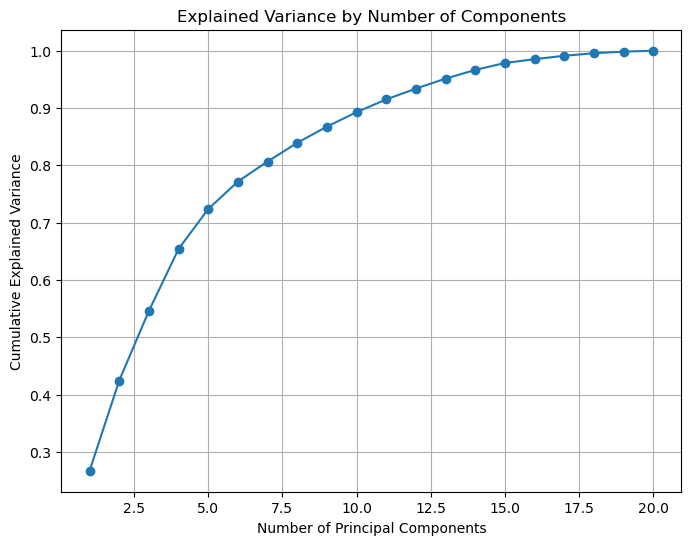

In [4]:
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Explained Variance by Number of Components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Number of Components")
plt.grid(True)
plt.show()

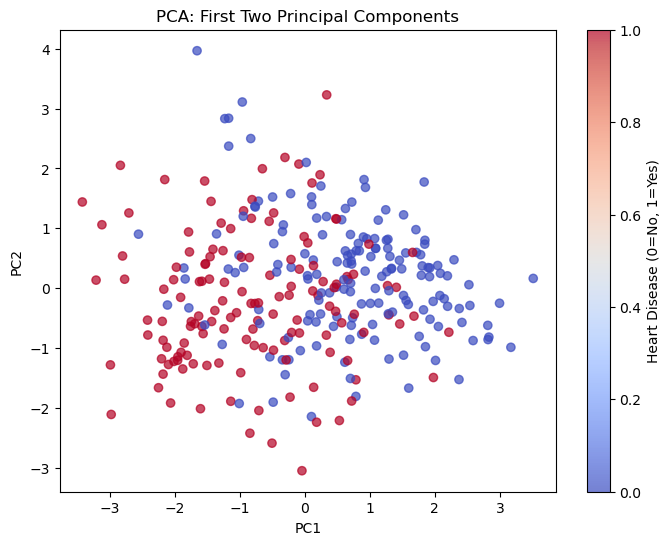

In [5]:
# PCA Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: First Two Principal Components")
plt.colorbar(label="Heart Disease (0=No, 1=Yes)")
plt.show()

In [6]:
# Apply PCA to preserve ~95% variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (303, 20)
Reduced shape: (303, 17)


### Save PCA Transformed Data


In [7]:
pca_columns = [f'PC{i+1}' for i in range(X_reduced.shape[1])]
pca_df = pd.DataFrame(X_reduced, columns=pca_columns)
pca_df['target'] = y.values

pca_df.to_csv('../Data/pca_transformed.csv', index=False)